<a href="https://colab.research.google.com/github/marco-milanesi/lqr-ppo/blob/main/TP1_Forearm_movements_and_LQR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget https://raw.githubusercontent.com/marco-milanesi/lqr-ppo/main/Dataset/two_movements.csv

--2022-12-03 11:25:35--  https://raw.githubusercontent.com/marco-milanesi/lqr-ppo/main/Dataset/two_movements.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10902 (11K) [text/plain]
Saving to: ‘two_movements.csv’

two_movements.csv   100%[===================>]  10.65K  --.-KB/s    in 0s      

2022-12-03 11:25:35 (68.8 MB/s) - ‘two_movements.csv’ saved [10902/10902]



In [9]:
!wget https://github.com/marco-milanesi/lqr-ppo/blob/main/Dataset/extracted_data_extended

--2022-12-03 11:25:40--  https://github.com/marco-milanesi/lqr-ppo/blob/main/Dataset/extracted_data_extended
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘extracted_data_extended’

extracted_data_exte     [ <=>                ] 135.95K  --.-KB/s    in 0.008s  

2022-12-03 11:25:41 (16.9 MB/s) - ‘extracted_data_extended’ saved [139214]



# 1. Visualizing and pre-processing the data

## Task 1
Open the file with any text editor to see how the file is formatted. Then, write a Python script to load movement data into a list.

In [ ]:
# the file is a csv file with ; as separator
index = -1
list_movement = []
list_temp =[]
time = []
position = []
substring = "Movement"
header = '#'

with open('two_movements.csv', "r") as _file :
  for line in _file :
    if header in line:
      continue
    if substring in line:
        list_movement.append(list_temp)
        list_temp = []
    list_temp.append(line)

list_movement = list_movement[1:]
    

In [ ]:
import pandas as pd

df_list = []
for j in range(0,len(list_movement)):
  for i in list_movement[j]:
    if substring in i:
      continue
    values = i.split (';')
    time.append(float(values[0]))
    position.append(float(values[1].strip("\n")))

  # Create the data set
  df=pd.DataFrame()
  # Labels
  df=pd.DataFrame(time,columns=['time'])
  # Energy Features
  df.insert(1,"Movement",position,True)
  df_list.append(df)
  time = []
  position = []

In [ ]:
df_list[0]

,time,Movement
0,2.3712,4153.0
1,2.3873,4153.0
2,2.3912,4155.0
3,2.4072,4158.0
4,2.4112,4175.0
...,...,...
373,6.3352,18977.0
374,6.3392,18966.0
375,6.3552,18925.0
376,6.3592,18844.0


In [ ]:
df_list[1]

,time,Movement
0,7.7872,4163.0
1,7.7912,4160.0
2,7.8072,4161.0
3,7.8112,4161.0
4,7.8272,4176.0
...,...,...
219,10.0912,18981.0
220,10.0952,18983.0
221,10.1112,18983.0
222,10.1152,18983.0


## Task 2
If you look at the time component of the signal, you notice that the sample times are uneven.
This will cause problems, so you first need to resample the data to have equally spaced samples. Do
that.

In [ ]:
from re import X
from operator import length_hint
import numpy as np
df_list_new = []
for i in range (0,len(df_list)):
  time = np.array(df_list[i]['time'])
  movement = np.array(df_list[i]['Movement'])
  x = np.arange(time[i], time[len(time)-1], 0.01)
  y = np.interp(x, time, movement)
  df=pd.DataFrame(x,columns=['time'])
  # Energy Features
  df.insert(1,"Movement",y,True)
  df_list_new.append(df)

In [ ]:
df_list_new[0]

,time,Movement
0,2.3712,4153.000
1,2.3812,4153.000
2,2.3912,4155.000
3,2.4012,4156.875
4,2.4112,4175.000
...,...,...
396,6.3312,18977.250
397,6.3412,18960.875
398,6.3512,18935.250
399,6.3612,18837.625


In [ ]:
df_list_new[1]

,time,Movement
0,7.7912,4160.000000
1,7.8012,4160.625000
2,7.8112,4161.000000
3,7.8212,4170.375000
4,7.8312,4282.000000
...,...,...
230,10.0912,18981.000000
231,10.1012,18983.000000
232,10.1112,18983.000000
233,10.1212,18981.881988


## Task 3
You can now drop the time signal, which is not informative anymore. Now, compute the
average of the two movements that you extracted.

The two movements don’t have the same length, what should you do?

In [ ]:
for i in df_list_new:
  i.drop('time', inplace=True, axis=1)

In [ ]:
average = []
import statistics
val_max = max(len(df_list_new[0]), len(df_list_new[1]))
for i in range(0, val_max):
  if i < len(df_list_new[1]):
    average.append(statistics.mean([float(df_list_new[0]['Movement'][i]), float(df_list_new[1]['Movement'][i])]))
  else:
    average.append(statistics.mean([float(df_list_new[0]['Movement'][i]), float(df_list_new[1]['Movement'][len(df_list_new[1])-1])]))


## Task 4
Load this file, visualize, and briefly describe the dataset. Also display the average trajectory
for each condition.


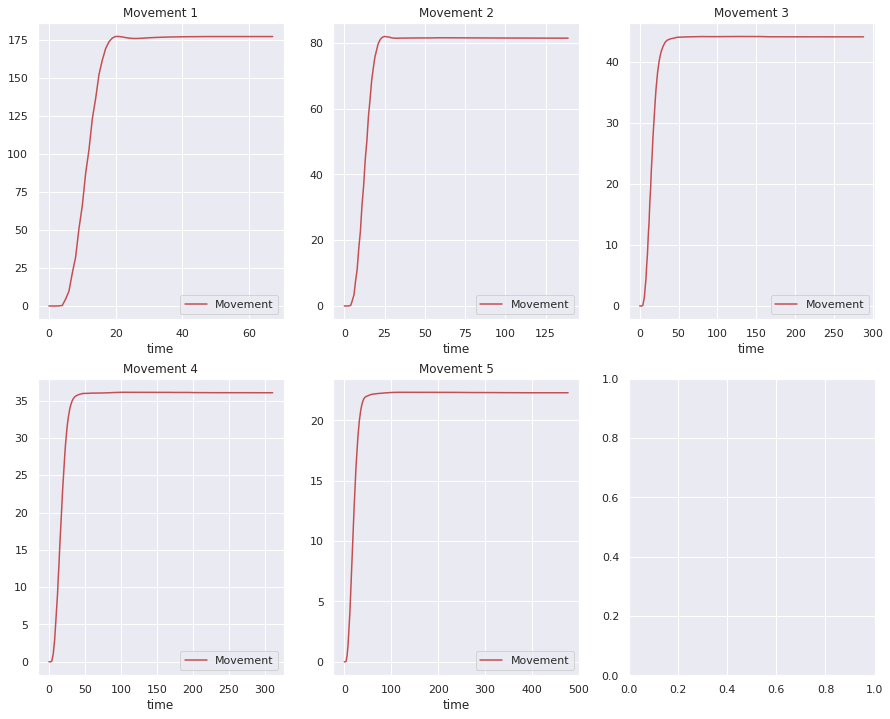

In [ ]:
# Pickle
average = []
import pickle
with open ("extracted_data_extended", "rb") as handle :
  dataset = pickle.load(handle)
dataset = dict(sorted(dataset.items(), key=lambda item: item[0],reverse=False))
names = list(dataset.keys())
values = list(dataset.values())

sns.set(rc={'figure.figsize':(15,12)})
average_trajectories = [None] * len(names)
fig, axs = plt.subplots(nrows=2, ncols=3)
for j in range(len(names)):
  [row, column] = np.shape(values[j])
  average = 0
  for i in range(row):
    average += values[j][i]
  average_trajectories[j] = average/column
  plt.subplot(2,3,j+1) 
  plt.plot(list(range(column)), average_trajectories[j], 'r-', label='Movement')
  plt.title('Movement ' + names[j])
  plt.xlabel('time')
  plt.legend()


## Task 5
For each condition, determine by the eye when the average movement ends (i.e., when it levels off)

# 2. Single-joint forearm dynamics

## Task 6
Put the system in the general form of a linear system.


$$
I \ddot{\theta} - b \dot{\theta} = \tau
$$

$$
\ddot{\theta} = \frac{\tau}{I} - \frac{b}{I} \dot{\theta}
$$

$$
x = \begin{bmatrix}
\theta\\ 
\dot{\theta}
\end{bmatrix} 
$$


$$
\ddot{x} = \begin{bmatrix}
\dot{\theta}\\ 
\ddot{\theta}
\end{bmatrix}
$$

$$
\dot{x} = Fx + G \tau
$$

$$
\ddot{x} = \begin{bmatrix}
\dot{\theta}\\ 
\ddot{\theta}
\end{bmatrix} = \begin{bmatrix}
0 & 1\\ 
0 & -\frac{b}{I}
\end{bmatrix}\begin{bmatrix}
\theta\\ 
\dot{\theta}
\end{bmatrix}+\begin{bmatrix}
0\\ 
\frac{1}{I}
\end{bmatrix}\tau
$$

## Task 7

Use the Euler forward approximation 
to find the equivalents of F and
G in discrete time.

$$
\dot{x}(t) = \frac{x[(k+1)T]-x[kt]}{\Delta T} = F x[kT] + Gu[kT]
$$

$$
x[(k+1)T] = x[kT] + F \Delta Tx[kT]+\Delta TGu[kT] = \\ = x[kT](I + F \Delta T) + \Delta T G u[kT]
$$

$$
A = I + F \Delta T \\
B = \Delta T G
$$



# 3. Linear Quadratic Regulator

## Task 8
Express $J$ as a function of $V$

# 4. LQR and Real Data

## Task 9
Write a function that “solves” the LQR (i.e., computes P, K and u) for any A, B, C, Q, QF , R.

In [ ]:
def lqr(x_0, Q, R, A, B, C, N):
    P = [None] * (N + 1)    
    Qf = Q
    P[N] = Qf
    for k in range(N-1, 0, -1):
        P[k] = Q + A.T @ P[k+1] @ A - A.T @ P[k+1] @ B @ np.linalg.inv(R + B.T @ P[k+1] @ B) @ B.T @ P[k+1] @ A
    K = [None] * N
    u = [None] * N
    x = [None] * (N+1)
    y = [None] * N
    x[0] = x_0
    J = 0
    for k in range(N):
        K[k] = -np.linalg.inv(R + B.T @ P[k+1] @ B) @ B.T @ P[k+1] @ A
        u[k] = K[k] @ x[k]
        x[k+1] = A@x[k] + B@u[k]
        y[k]= float(C@x[k])
        J += (x[k].T@Q@x[k]+u[k].T@R@u[k])
    J += x[N].T@Qf@x[N]
    return P, K, u, x, y, J

In [ ]:
A = np.array([[1, 0.01], [0, 1-0.01*0.2/0.25]])
B = np.array([[0], [0.01/0.25]])
C = np.array([[1, 0]])
N = 100
Q = C.T @ C
Qf = Q
rho = 0.001
R = rho * np.eye(1)
Q = C.T @ C
Qf = Q
x_0 = np.array([[0.15],[0]]).reshape(2,1)
P, K, u, x, y, J = lqr(x_0, Q, R, A, B, C, N)

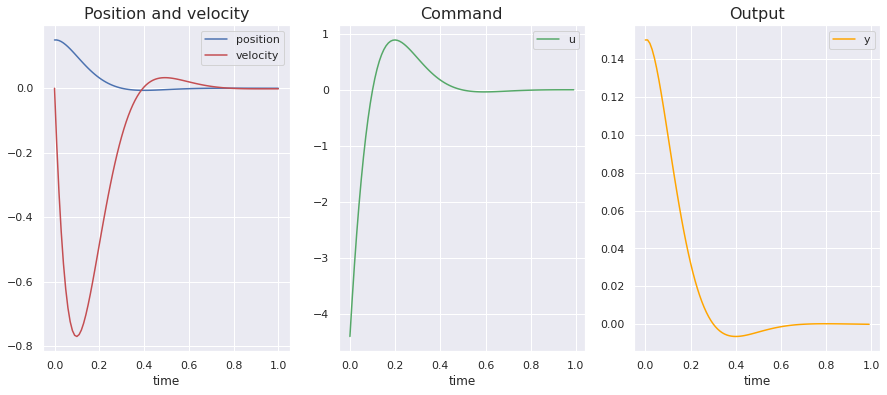

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
time = np.arange(0,(N+1)*0.01,0.01)
pos = []
vel = []
for i in x:
  pos.append(float(i[0]))
  vel.append(float(i[1]))
sns.set(rc={'figure.figsize':(15,6)})
plt.subplot(1,3,1)
plt.plot(time, pos, 'b-', label='position')
plt.plot(time, vel, 'r-', label='velocity')
plt.title('Position and velocity', fontsize=16)
plt.xlabel('time')
plt.legend()
time = np.arange(0,(N)*0.01,0.01)
u_list = []
for i in u:
  u_list.append(float(i))
plt.subplot(1,3,2)
plt.plot(time, u_list, 'g-', label='u')
plt.title('Command', fontsize=16)
plt.xlabel('time')
plt.legend()
plt.subplot(1,3,3)
plt.plot(time, y,'orange',label='y')
plt.title('Output', fontsize=16)
plt.xlabel('time')
plt.legend()

## Task 11

Try out with multiple values of ρ and compare. Comment on the differences between solutions

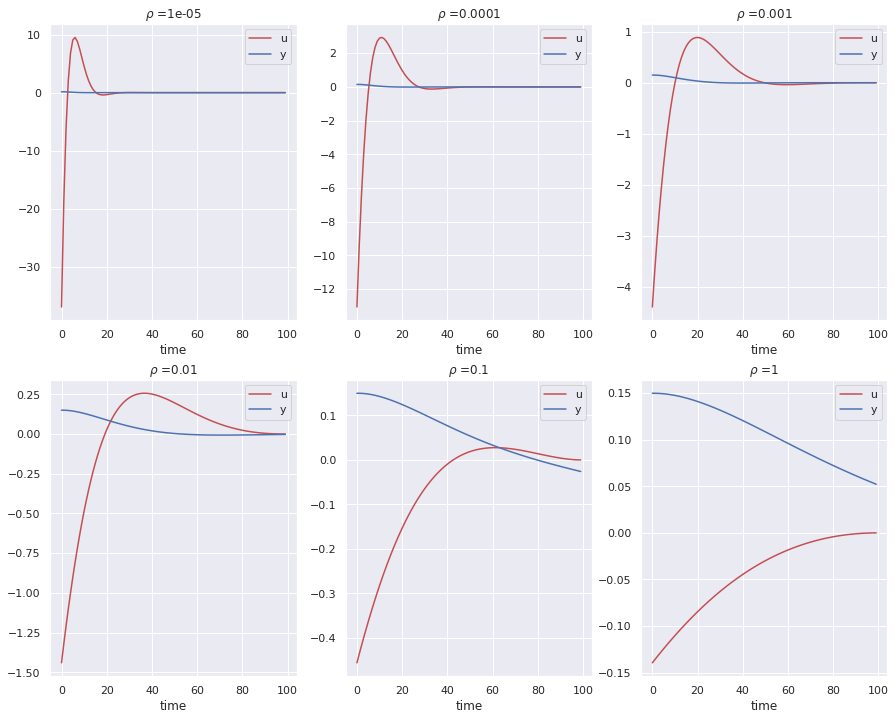

In [ ]:
rho = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
sns.set(rc={'figure.figsize':(15,12)})
index = 1
for i in rho:
  R = i * np.eye(1)
  _, _, u, x, y, _ = lqr(x_0, Q, R, A, B, C, N)
  u = [float(u) for u in u]
  y = [float(y) for y in y]
  plt.subplot(2,3,index)
  plt.plot(list(range(len(u))), u, 'r-', label='u')
  plt.plot(list(range(len(y))), y, 'b-', label='y')
  plt.title(r'$\rho$ =' + str(i))
  plt.xlabel('time')
  plt.legend()
  index += 1  

## Task 12

In [ ]:
def f(rho):
  R = rho * np.eye(1)
  _, _, _, _, y, _ = lqr(x_0, Q, R, A, B, C, 68)
  return np.linalg.norm(y-average_trajectories[0])

In [ ]:
from scipy import optimize

sol = optimize.minimize(f, 0.001)
sol.x

array([216.7285394])

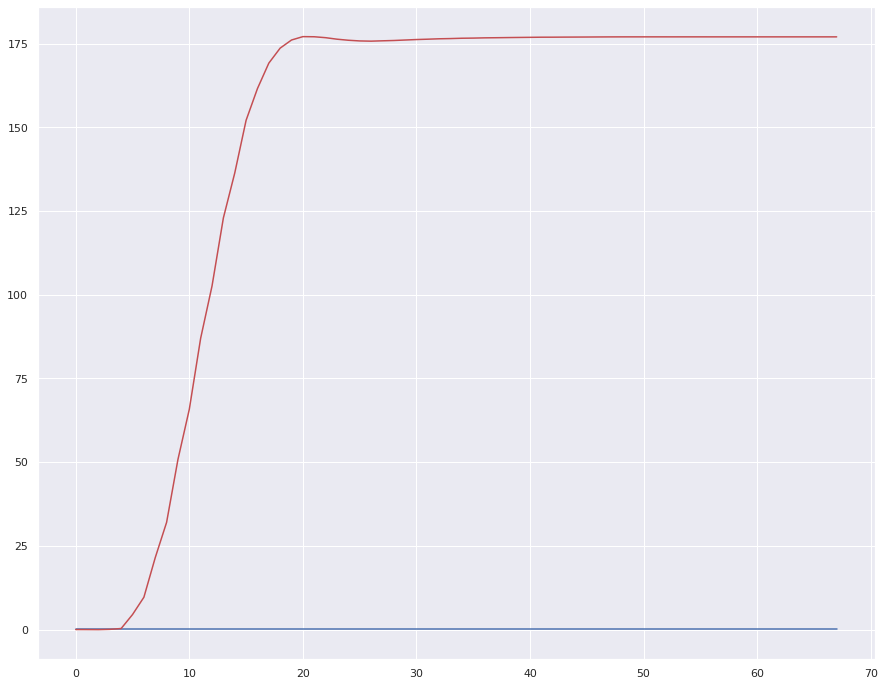

In [ ]:
rho = sol.x
R = rho * np.eye(1)
_, _, _, _, y, _ = lqr(x_0, Q, R, A, B, C, 68)
y = [float(y) for y in y]
plt.plot(list(range(len(y))), y, 'b-', label='u')
plt.plot(average_trajectories[0],'r-')